In [109]:
# Lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_excel("I:\MLpratice\Assignment_Data.xlsx")

In [111]:
df.head()

,Tenure_Range,Status Record Date,Empl Id,Work City,Mgr Flag,Current Hire Date,Service Date,Term Effective Date,Time in Role,Gender,Reporting Level,Age,Current rating,Previous Rating,2 yrs back Rating,Director and above,Tot Dir Rpts,Salary,Term
0,5-10 Years,2022-07-31,1,Mumbai,Yes,2016-06-01,2016-06-01,NaT,1.41,Male,4,53,3.0,4.0,3.0,Yes,5.0,19908810.9,No
1,5-10 Years,2022-07-31,2,Mumbai,Yes,2016-07-01,2016-07-01,NaT,1.00,Male,5,45,3.0,4.0,3.0,Yes,9.0,8148764.8,No
2,5-10 Years,2022-07-31,3,Pune,Yes,2016-07-07,2016-07-07,NaT,2.48,Male,4,48,3.0,4.0,4.0,Yes,9.0,15763576.4,No
3,5-10 Years,2022-07-31,4,Pune,Yes,2016-07-13,2016-07-13,NaT,1.58,Male,5,55,3.0,3.0,3.0,Yes,5.0,7107918.4,No
4,5-10 Years,2022-07-31,5,Mumbai,Yes,2016-08-01,2016-08-01,NaT,4.80,Male,4,56,3.0,4.0,3.0,Yes,6.0,22957386.1,No


In [112]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tenure_Range         6251 non-null   object        
 1   Status Record Date   6251 non-null   datetime64[ns]
 2   Empl Id              6251 non-null   int64         
 3   Work City            6251 non-null   object        
 4   Mgr Flag             6248 non-null   object        
 5   Current Hire Date    6251 non-null   datetime64[ns]
 6   Service Date         6251 non-null   datetime64[ns]
 7   Term Effective Date  691 non-null    datetime64[ns]
 8   Time in Role         6251 non-null   float64       
 9   Gender               6251 non-null   object        
 10  Reporting Level      6251 non-null   int64         
 11  Age                  6251 non-null   int64         
 12  Current rating       4380 non-null   float64       
 13  Previous Rating      5830 non-nul

In [113]:
#write function to check percentage of null values of columns in dataframe

import pandas as pd

def check_null_percentage(df):
    # Calculate the percentage of null values in each column
    null_percentages = df.isnull().sum() / len(df) * 100

    # Create a DataFrame to store the results
    null_df = pd.DataFrame({'Column': null_percentages.index, 'Null Percentage': null_percentages.values})

    # Sort the DataFrame by null percentage in descending order
    null_df = null_df.sort_values(by='Null Percentage', ascending=False)

    return null_df

# Example usage:
null_df = check_null_percentage(df)
print(null_df)




                 Column  Null Percentage
7   Term Effective Date        88.945769
12       Current rating        29.931211
17               Salary         6.750920
16         Tot Dir Rpts         6.734922
15   Director and above         6.734922
14    2 yrs back Rating         6.734922
13      Previous Rating         6.734922
4              Mgr Flag         0.047992
0          Tenure_Range         0.000000
11                  Age         0.000000
9                Gender         0.000000
10      Reporting Level         0.000000
1    Status Record Date         0.000000
8          Time in Role         0.000000
6          Service Date         0.000000
5     Current Hire Date         0.000000
3             Work City         0.000000
2               Empl Id         0.000000
18                 Term         0.000000


In [114]:
# since percentage of Term Effective date  column is more than 30% so dropping the coulmn.

df1 = df.drop(columns='Term Effective Date')


In [115]:
df.shape

(6251, 19)

In [116]:
df1.shape

(6251, 18)

In [117]:
# dropping rows having null values   

df2 =df1.dropna()

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4378 entries, 0 to 5960
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tenure_Range        4378 non-null   object        
 1   Status Record Date  4378 non-null   datetime64[ns]
 2   Empl Id             4378 non-null   int64         
 3   Work City           4378 non-null   object        
 4   Mgr Flag            4378 non-null   object        
 5   Current Hire Date   4378 non-null   datetime64[ns]
 6   Service Date        4378 non-null   datetime64[ns]
 7   Time in Role        4378 non-null   float64       
 8   Gender              4378 non-null   object        
 9   Reporting Level     4378 non-null   int64         
 10  Age                 4378 non-null   int64         
 11  Current rating      4378 non-null   float64       
 12  Previous Rating     4378 non-null   float64       
 13  2 yrs back Rating   4378 non-null   float64     

since the more than 30% data is loss so reconsidering so filling 'current rating' null values

In [119]:
# checking columns
df.columns

Index(['Tenure_Range', 'Status Record Date', 'Empl Id', 'Work City',
       'Mgr Flag', 'Current Hire Date', 'Service Date', 'Term Effective Date',
       'Time in Role', 'Gender', 'Reporting Level', 'Age', 'Current rating',
       'Previous Rating', '2 yrs back Rating', 'Director and above',
       'Tot Dir Rpts', 'Salary', 'Term'],
      dtype='object')

In [120]:
# chceking values in current rating
df['Current rating'].value_counts()

3.0    2819
4.0    1307
5.0     191
2.0      63
Name: Current rating, dtype: int64

In [121]:
# creating one more category 1.0 to fill null values

dfn= df['Current rating'].fillna(1.0)
df['Current rating']=dfn

In [122]:
df['Current rating'].value_counts()

3.0    2819
1.0    1871
4.0    1307
5.0     191
2.0      63
Name: Current rating, dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tenure_Range         6251 non-null   object        
 1   Status Record Date   6251 non-null   datetime64[ns]
 2   Empl Id              6251 non-null   int64         
 3   Work City            6251 non-null   object        
 4   Mgr Flag             6248 non-null   object        
 5   Current Hire Date    6251 non-null   datetime64[ns]
 6   Service Date         6251 non-null   datetime64[ns]
 7   Term Effective Date  691 non-null    datetime64[ns]
 8   Time in Role         6251 non-null   float64       
 9   Gender               6251 non-null   object        
 10  Reporting Level      6251 non-null   int64         
 11  Age                  6251 non-null   int64         
 12  Current rating       6251 non-null   float64       
 13  Previous Rating      5830 non-nul

In [124]:
# dropping Term Effective Date col
df2= df.drop(columns='Term Effective Date')

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tenure_Range        6251 non-null   object        
 1   Status Record Date  6251 non-null   datetime64[ns]
 2   Empl Id             6251 non-null   int64         
 3   Work City           6251 non-null   object        
 4   Mgr Flag            6248 non-null   object        
 5   Current Hire Date   6251 non-null   datetime64[ns]
 6   Service Date        6251 non-null   datetime64[ns]
 7   Time in Role        6251 non-null   float64       
 8   Gender              6251 non-null   object        
 9   Reporting Level     6251 non-null   int64         
 10  Age                 6251 non-null   int64         
 11  Current rating      6251 non-null   float64       
 12  Previous Rating     5830 non-null   float64       
 13  2 yrs back Rating   5830 non-null   float64     

In [126]:
# dropping all rows having null values
df3= df2.dropna()

In [127]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 0 to 6244
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tenure_Range        5829 non-null   object        
 1   Status Record Date  5829 non-null   datetime64[ns]
 2   Empl Id             5829 non-null   int64         
 3   Work City           5829 non-null   object        
 4   Mgr Flag            5829 non-null   object        
 5   Current Hire Date   5829 non-null   datetime64[ns]
 6   Service Date        5829 non-null   datetime64[ns]
 7   Time in Role        5829 non-null   float64       
 8   Gender              5829 non-null   object        
 9   Reporting Level     5829 non-null   int64         
 10  Age                 5829 non-null   int64         
 11  Current rating      5829 non-null   float64       
 12  Previous Rating     5829 non-null   float64       
 13  2 yrs back Rating   5829 non-null   float64     

In [128]:
#write a function to get object type columns and int or float datatype columns separately from dataframe
import pandas as pd

def separate_columns_by_type(df):
    object_columns = df.select_dtypes(include='object').columns.tolist()
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
    return object_columns, numeric_columns

# Example usage:

object_cols, numeric_cols = separate_columns_by_type(df)
numeric_cols.remove('Empl Id')
print("Object columns:", object_cols)
print("Numeric columns:", numeric_cols)


Object columns: ['Tenure_Range', 'Work City', 'Mgr Flag', 'Gender', 'Director and above', 'Term']
Numeric columns: ['Time in Role', 'Reporting Level', 'Age', 'Current rating', 'Previous Rating', '2 yrs back Rating', 'Tot Dir Rpts', 'Salary']


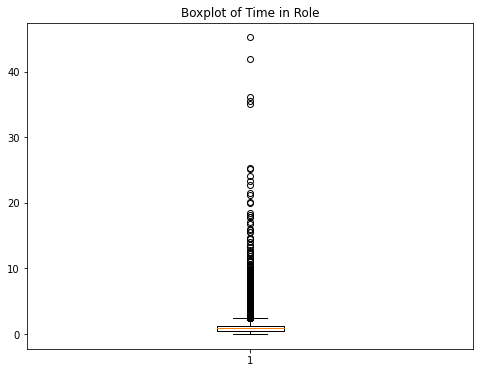

Outliers for : Time in Role
#################################


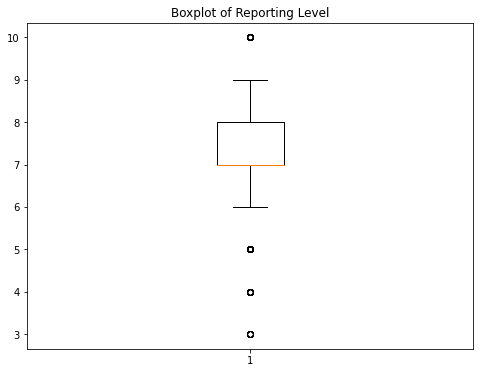

Outliers for : Reporting Level
#################################


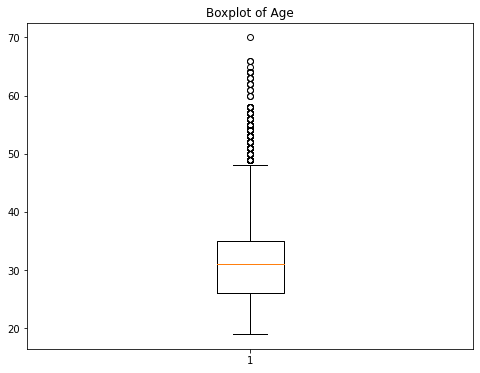

Outliers for : Age
#################################


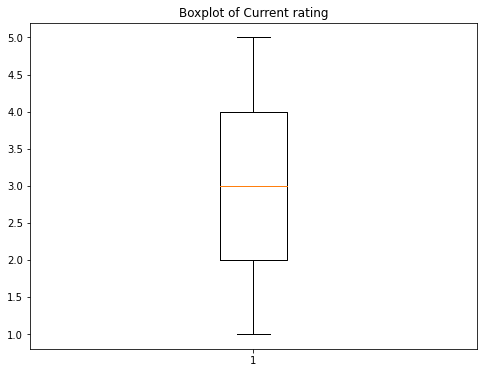

Outliers for : Current rating
#################################


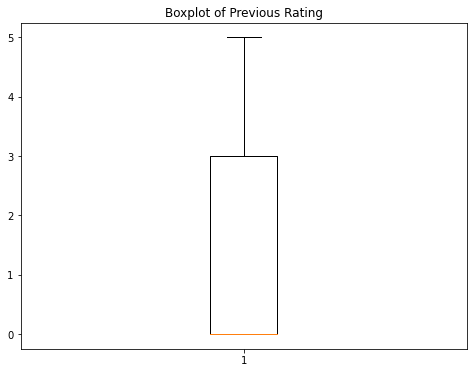

Outliers for : Previous Rating
#################################


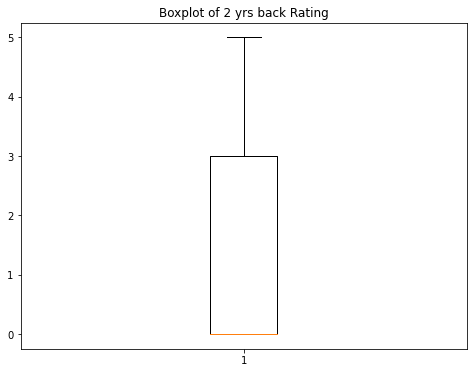

Outliers for : 2 yrs back Rating
#################################


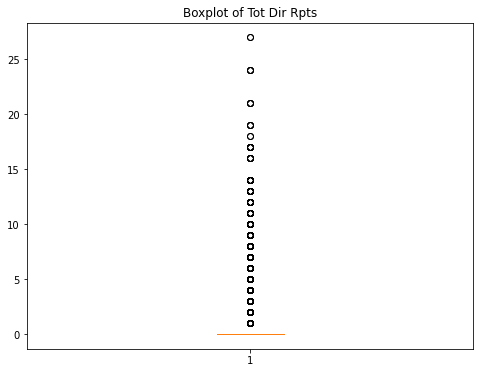

Outliers for : Tot Dir Rpts
#################################


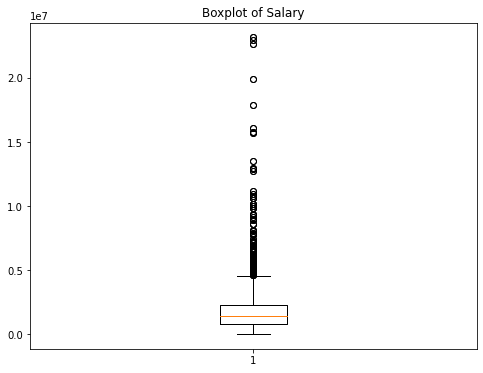

Outliers for : Salary
#################################


In [129]:
# write a function to check outliers from column in dataframe and plot a boxplot


import pandas as pd
import matplotlib.pyplot as plt

def check_outliers_and_plot(df, column_name):
    # Get the specified column from the DataFrame
    column_data = df[column_name]

    # Calculate the lower and upper quartiles
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Identify outliers
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

    # Plot a boxplot of the column
    plt.figure(figsize=(8, 6))
    plt.boxplot(column_data)
    plt.title('Boxplot of ' + column_name)
    plt.show()

    return outliers

# Example usage:
for i in numeric_cols:
    outliers = check_outliers_and_plot(df3, i)
    if i=='Empl Id':
        continue
    print("Outliers for :",i)
    #print(outliers)
    print('#################################')


In [130]:
#

for i in numeric_cols:
    v=df3[i].value_counts()
    print(f'the value counts for {i} is {v}')
    #print(outliers)

the value counts for Time in Role is 1.080000    545
1.580000    369
0.410000    363
0.500000    359
1.160000    323
           ... 
5.819178      1
6.183562      1
5.200000      1
6.660274      1
0.271233      1
Name: Time in Role, Length: 502, dtype: int64
the value counts for Reporting Level is 7     2422
8     1859
6      798
9      469
5      190
10      52
4       32
3        7
Name: Reporting Level, dtype: int64
the value counts for Age is 32    472
31    424
30    362
29    359
24    328
33    313
28    309
34    296
25    282
26    270
35    248
27    247
23    229
36    191
37    183
22    172
38    157
40    153
21    151
20    113
39    103
42     71
41     69
44     41
43     39
45     37
46     28
47     28
19     24
48     20
49     19
53     11
51     11
54      9
55      8
50      7
52      7
57      7
56      7
58      6
64      4
62      3
63      3
61      2
66      2
60      2
70      1
65      1
Name: Age, dtype: int64
the value counts for Current rating is 3.0   

In [131]:
# droping the employee id columns

df3.drop('Empl Id', inplace = True, axis = 1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_8172/1838513181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop('Empl Id', inplace = True, axis = 1)


In [132]:
df3.columns

Index(['Tenure_Range', 'Status Record Date', 'Work City', 'Mgr Flag',
       'Current Hire Date', 'Service Date', 'Time in Role', 'Gender',
       'Reporting Level', 'Age', 'Current rating', 'Previous Rating',
       '2 yrs back Rating', 'Director and above', 'Tot Dir Rpts', 'Salary',
       'Term'],
      dtype='object')

In [133]:
df3.head()

,Tenure_Range,Status Record Date,Work City,Mgr Flag,Current Hire Date,Service Date,Time in Role,Gender,Reporting Level,Age,Current rating,Previous Rating,2 yrs back Rating,Director and above,Tot Dir Rpts,Salary,Term
0,5-10 Years,2022-07-31,Mumbai,Yes,2016-06-01,2016-06-01,1.41,Male,4,53,3.0,4.0,3.0,Yes,5.0,19908810.9,No
1,5-10 Years,2022-07-31,Mumbai,Yes,2016-07-01,2016-07-01,1.00,Male,5,45,3.0,4.0,3.0,Yes,9.0,8148764.8,No
2,5-10 Years,2022-07-31,Pune,Yes,2016-07-07,2016-07-07,2.48,Male,4,48,3.0,4.0,4.0,Yes,9.0,15763576.4,No
3,5-10 Years,2022-07-31,Pune,Yes,2016-07-13,2016-07-13,1.58,Male,5,55,3.0,3.0,3.0,Yes,5.0,7107918.4,No
4,5-10 Years,2022-07-31,Mumbai,Yes,2016-08-01,2016-08-01,4.80,Male,4,56,3.0,4.0,3.0,Yes,6.0,22957386.1,No


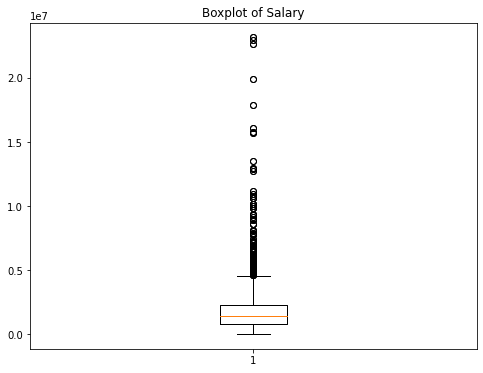

Outliers for : 226 0       19908810.9
1        8148764.8
2       15763576.4
3        7107918.4
4       22957386.1
           ...    
5185     6248000.0
5192     5484255.7
5622     5127034.0
5632     6132116.1
5849     6863733.8
Name: Salary, Length: 226, dtype: float64


In [134]:
# cheaacking outliers for salary
outliers = check_outliers_and_plot(df3, 'Salary')

print("Outliers for :",len(outliers),outliers)

here total outliers are 26 so replacing wih mean

In [135]:
# function to find outliers and replace with mean
import pandas as pd

def replace_outliers_with_mean(df, column_name):
    # Get the specified column from the DataFrame
    column_data = df[column_name]

    # Calculate the lower and upper quartiles
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Replace outliers with the mean value
    mean_value = column_data.mean()
    column_data_outliers_replaced = column_data.where((column_data >= lower_bound) & (column_data <= upper_bound), mean_value)

    # Update the column in the DataFrame
    df[column_name] = column_data_outliers_replaced

    return df


df4 = replace_outliers_with_mean(df3, 'Salary')
print("DataFrame with Outliers Replaced:")



DataFrame with Outliers Replaced:


C:\Users\Admin\AppData\Local\Temp/ipykernel_8172/358497693.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = column_data_outliers_replaced


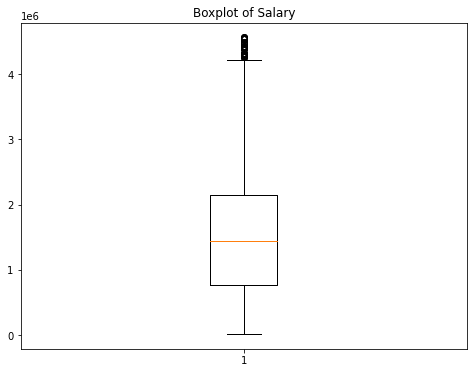

Outliers for : 57 15      4307831.0
36      4302950.3
39      4414325.3
49      4331317.1
60      4309356.7
61      4433423.5
119     4261611.2
145     4408624.0
146     4386558.0
147     4549481.2
160     4311247.6
168     4290963.6
208     4554366.3
313     4280760.0
336     4398887.9
346     4538971.8
456     4565137.5
526     4290000.0
650     4425720.2
745     4496312.7
835     4274817.8
859     4462070.8
1047    4270005.3
1458    4535105.3
1582    4428831.0
2059    4298187.3
2090    4303435.4
2453    4303435.4
2793    4307831.0
2816    4302950.3
2818    4414325.3
2827    4331317.1
2837    4309356.7
2840    4433423.5
2897    4261611.2
2922    4408624.0
2923    4386558.0
2926    4549481.2
2936    4311247.6
2943    4290963.6
2989    4554366.3
3084    4280760.0
3110    4398887.9
3124    4538971.8
3228    4565137.5
3300    4290000.0
3421    4425720.2
3515    4496312.7
3603    4274817.8
3628    4462070.8
3808    4270005.3
4204    4535105.3
4793    4298187.3
4827    4303435.4
5187    43

In [136]:
# cheacking outliers replaced or not
outliers = check_outliers_and_plot(df4, 'Salary')

print("Outliers for :",len(outliers),outliers)

In [137]:
#   

object_cols

['Tenure_Range',
 'Work City',
 'Mgr Flag',
 'Gender',
 'Director and above',
 'Term']

In [138]:
for i in object_cols:
    v=df3[i].value_counts()
    print(f'the number of values in column {i} are {v}')
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%', i, len(v))      

the number of values in column Tenure_Range are 0-5 years      4356
5-10 Years      792
0-3 Years       506
3-6 Years        76
6-10 Years       55
15+ Years        24
10-15 Years      20
Name: Tenure_Range, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Tenure_Range 7
the number of values in column Work City are Pune      3876
Mumbai    1953
Name: Work City, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Work City 2
the number of values in column Mgr Flag are No     4939
Yes     890
Name: Mgr Flag, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Mgr Flag 2
the number of values in column Gender are Male                    3823
Female                  2002
Prefer Not To Answer       3
Non-binary                 1
Name: Gender, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Gender 4
the number of values in column Director and above are No     5316
Yes     513
Name: Director and above, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Director and above 2
the number of values in column Term are No

In [139]:
# filtering just mail and female values

df5 = df4.drop(df4.loc[df4['Gender']=='Prefer Not To Answer'].index, axis =0)
df5 = df5.drop(df5.loc[df5['Gender']=='Non-binary'].index, axis =0)

In [142]:
df5['Gender'].value_counts()

Male      3823
Female    2002
Name: Gender, dtype: int64

In [143]:
object_cols

['Tenure_Range',
 'Work City',
 'Mgr Flag',
 'Gender',
 'Director and above',
 'Term']

In [144]:
object_cols.remove('Term')

In [145]:
object_cols

['Tenure_Range', 'Work City', 'Mgr Flag', 'Gender', 'Director and above']

In [162]:
df5.corr()

,Time in Role,Reporting Level,Age,Current rating,Previous Rating,2 yrs back Rating,Tot Dir Rpts,Salary
Time in Role,1.000000,-0.096451,0.367667,0.134898,0.191772,0.208601,0.040448,-0.149917
Reporting Level,-0.096451,1.000000,-0.404653,0.012532,-0.121910,-0.183964,-0.332582,-0.283425
Age,0.367667,-0.404653,1.000000,0.270914,0.446285,0.456413,0.392256,0.483206
Current rating,0.134898,0.012532,0.270914,1.000000,0.590842,0.450471,0.197838,0.217905
Previous Rating,0.191772,-0.121910,0.446285,0.590842,1.000000,0.767237,0.289120,0.303014
2 yrs back Rating,0.208601,-0.183964,0.456413,0.450471,0.767237,1.000000,0.303039,0.342390
Tot Dir Rpts,0.040448,-0.332582,0.392256,0.197838,0.289120,0.303039,1.000000,0.323418
Salary,-0.149917,-0.283425,0.483206,0.217905,0.303014,0.342390,0.323418,1.000000


In [153]:
#Handling categorical values

import pandas as pd

def handle_categorical_column(df, column_name):
    # Perform one-hot encoding on the categorical column
    encoded_df = pd.get_dummies(df, columns=[column_name], drop_first=True)

    return encoded_df

# Example usage:
#for i in object_cols:
encoded_df = handle_categorical_column(df5, 'Tenure_Range')
encoded_df = handle_categorical_column(encoded_df, 'Work City')
encoded_df = handle_categorical_column(encoded_df, 'Mgr Flag')
encoded_df = handle_categorical_column(encoded_df, 'Gender')
encoded_df = handle_categorical_column(encoded_df, 'Director and above')
print("Encoded DataFrame:")
print(encoded_df.columns)


Encoded DataFrame:
Index(['Status Record Date', 'Current Hire Date', 'Service Date',
       'Time in Role', 'Reporting Level', 'Age', 'Current rating',
       'Previous Rating', '2 yrs back Rating', 'Tot Dir Rpts', 'Salary',
       'Term', 'Tenure_Range_0-5 years', 'Tenure_Range_10-15 Years',
       'Tenure_Range_15+ Years', 'Tenure_Range_3-6 Years',
       'Tenure_Range_5-10 Years', 'Tenure_Range_6-10 Years', 'Work City_Pune',
       'Mgr Flag_Yes', 'Gender_Male', 'Director and above_Yes'],
      dtype='object')


In [154]:
encoded_df.columns

Index(['Status Record Date', 'Current Hire Date', 'Service Date',
       'Time in Role', 'Reporting Level', 'Age', 'Current rating',
       'Previous Rating', '2 yrs back Rating', 'Tot Dir Rpts', 'Salary',
       'Term', 'Tenure_Range_0-5 years', 'Tenure_Range_10-15 Years',
       'Tenure_Range_15+ Years', 'Tenure_Range_3-6 Years',
       'Tenure_Range_5-10 Years', 'Tenure_Range_6-10 Years', 'Work City_Pune',
       'Mgr Flag_Yes', 'Gender_Male', 'Director and above_Yes'],
      dtype='object')

In [155]:
object_cols

['Tenure_Range', 'Work City', 'Mgr Flag', 'Gender', 'Director and above']

In [159]:
#
output = df5['Term']
encoded_df['Term'] = output

In [160]:
encoded_df.corr()

,Time in Role,Reporting Level,Age,Current rating,Previous Rating,2 yrs back Rating,Tot Dir Rpts,Salary,Tenure_Range_0-5 years,Tenure_Range_10-15 Years,Tenure_Range_15+ Years,Tenure_Range_3-6 Years,Tenure_Range_5-10 Years,Tenure_Range_6-10 Years,Work City_Pune,Mgr Flag_Yes,Gender_Male,Director and above_Yes
Time in Role,1.000000,-0.096451,0.367667,0.134898,0.191772,0.208601,0.040448,-0.149917,-0.228448,0.325168,0.732851,0.202528,-0.016391,0.342386,-0.037646,0.033413,0.008153,0.151631
Reporting Level,-0.096451,1.000000,-0.404653,0.012532,-0.121910,-0.183964,-0.332582,-0.283425,0.282374,-0.080371,-0.067244,-0.028345,-0.189669,-0.092970,0.109714,-0.396888,-0.054229,-0.492039
Age,0.367667,-0.404653,1.000000,0.270914,0.446285,0.456413,0.392256,0.483206,-0.193485,0.163384,0.214296,0.064984,0.341772,0.175610,-0.072621,0.469021,0.177715,0.496236
Current rating,0.134898,0.012532,0.270914,1.000000,0.590842,0.450471,0.197838,0.217905,0.016806,0.016175,0.023973,0.044393,0.233527,0.037225,0.054772,0.209326,0.056828,0.147096
Previous Rating,0.191772,-0.121910,0.446285,0.590842,1.000000,0.767237,0.289120,0.303014,-0.229873,0.048191,0.057577,0.109850,0.409574,0.085051,-0.033866,0.326193,0.103894,0.249767
2 yrs back Rating,0.208601,-0.183964,0.456413,0.450471,0.767237,1.000000,0.303039,0.342390,-0.376763,0.072813,0.082551,0.135381,0.544508,0.124148,-0.035577,0.351185,0.089918,0.297471
Tot Dir Rpts,0.040448,-0.332582,0.392256,0.197838,0.289120,0.303039,1.000000,0.323418,-0.156993,0.025093,0.017947,0.019373,0.267184,-0.025004,-0.038391,0.750978,0.112532,0.571215
Salary,-0.149917,-0.283425,0.483206,0.217905,0.303014,0.342390,0.323418,1.000000,0.020096,-0.077757,-0.090663,-0.057857,0.372114,-0.137020,-0.020467,0.432682,0.213685,0.295782
Tenure_Range_0-5 years,-0.228448,0.282374,-0.193485,0.016806,-0.229873,-0.376763,-0.156993,0.020096,1.000000,-0.098508,-0.110761,-0.197990,-0.683097,-0.166573,0.267420,-0.184099,-0.026537,-0.234387
Tenure_Range_10-15 Years,0.325168,-0.080371,0.163384,0.016175,0.048191,0.072813,0.025093,-0.077757,-0.098508,1.000000,-0.003680,-0.006577,-0.022693,-0.005534,-0.042361,0.034285,0.009700,0.099210


In [181]:
encoded_df.head()

,Status Record Date,Current Hire Date,Service Date,Time in Role,Reporting Level,Age,Current rating,Previous Rating,2 yrs back Rating,Tot Dir Rpts,...,Tenure_Range_0-5 years,Tenure_Range_10-15 Years,Tenure_Range_15+ Years,Tenure_Range_3-6 Years,Tenure_Range_5-10 Years,Tenure_Range_6-10 Years,Work City_Pune,Mgr Flag_Yes,Gender_Male,Director and above_Yes
0,2022-07-31,2016-06-01,2016-06-01,1.41,4,53,3.0,4.0,3.0,5.0,...,0.0,0,0,0,1,0.0,0,1,1,1
1,2022-07-31,2016-07-01,2016-07-01,1.00,5,45,3.0,4.0,3.0,9.0,...,0.0,0,0,0,1,0.0,0,1,1,1
2,2022-07-31,2016-07-07,2016-07-07,2.48,4,48,3.0,4.0,4.0,9.0,...,0.0,0,0,0,1,0.0,1,1,1,1
3,2022-07-31,2016-07-13,2016-07-13,1.58,5,55,3.0,3.0,3.0,5.0,...,0.0,0,0,0,1,0.0,1,1,1,1
4,2022-07-31,2016-08-01,2016-08-01,4.80,4,56,3.0,4.0,3.0,6.0,...,0.0,0,0,0,1,0.0,0,1,1,1


In [185]:
kt=encoded_df.iloc[:,3:]
kt.head()

,Time in Role,Reporting Level,Age,Current rating,Previous Rating,2 yrs back Rating,Tot Dir Rpts,Salary,Term,Tenure_Range_0-5 years,Tenure_Range_10-15 Years,Tenure_Range_15+ Years,Tenure_Range_3-6 Years,Tenure_Range_5-10 Years,Tenure_Range_6-10 Years,Work City_Pune,Mgr Flag_Yes,Gender_Male,Director and above_Yes
0,1.41,4,53,3.0,4.0,3.0,5.0,1.753256e+06,No,0.0,0,0,0,1,0.0,0,1,1,1
1,1.00,5,45,3.0,4.0,3.0,9.0,1.753256e+06,No,0.0,0,0,0,1,0.0,0,1,1,1
2,2.48,4,48,3.0,4.0,4.0,9.0,1.753256e+06,No,0.0,0,0,0,1,0.0,1,1,1,1
3,1.58,5,55,3.0,3.0,3.0,5.0,1.753256e+06,No,0.0,0,0,0,1,0.0,1,1,1,1
4,4.80,4,56,3.0,4.0,3.0,6.0,1.753256e+06,No,0.0,0,0,0,1,0.0,0,1,1,1


In [161]:
encoded_df.columns

Index(['Status Record Date', 'Current Hire Date', 'Service Date',
       'Time in Role', 'Reporting Level', 'Age', 'Current rating',
       'Previous Rating', '2 yrs back Rating', 'Tot Dir Rpts', 'Salary',
       'Term', 'Tenure_Range_0-5 years', 'Tenure_Range_10-15 Years',
       'Tenure_Range_15+ Years', 'Tenure_Range_3-6 Years',
       'Tenure_Range_5-10 Years', 'Tenure_Range_6-10 Years', 'Work City_Pune',
       'Mgr Flag_Yes', 'Gender_Male', 'Director and above_Yes'],
      dtype='object')

In [186]:
# Independent features and dependent features
x = kt.drop(["Term"],axis=1)
y = kt.Term

In [187]:
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state= 0, test_size = 0.2)

In [188]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [189]:
rf.score(X_test,y_test)

0.9957081545064378